# ..**##########_First personal project Netflix_##########**..

# Etude des films et séries disponibles sur Netflix jusqu'en 2021.

## 1.	Lecture du fichier

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# on défini la colonne 1 du fichier (show_id) comme index du dataframe.
donnees=pd.read_csv("netflix_titles.csv", index_col=[0])

In [2]:
# aperçu du dataframe
donnees.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Dimension du dataframe

In [3]:
donnees.shape

(8807, 11)

Il y a 8807 lignes, soit 8807 films/séries et 11 colonnes

## Films et séries présent dans ce dataframe

In [4]:
# on sélectionne la colonne "type" et on comptes les valeurs grâce a value_count() 
donnees["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Il y a 6131 films et 2676 séries sur Netflix.

## Résumé statistique du dataframe

In [5]:
donnees.describe(include="all")

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,Movie,High Flying Bird,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


## Valeurs manquantes

In [6]:
# nombre de valeurs manquantes dans le dataframe
donnees.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Il y a :
* 2634 valeurs manquantes dans la colonne des directeurs
* 825 valeurs manquantes dans la colonne des acteurs 
* 831 films/séries pour lesquels on ne connait pas le pays où il a été produit
* 10 films/séries pour lesquels on ne connait pas la date d'ajout sur netflix
* 4 films/séries qui n'ont pas de classement de leur contenu
* 3 films/séries qui n'ont pas de durée

##	Exploration des valeurs manquantes 

### Sur la colonne des directeurs de production

In [7]:
#On sélectionne les lignes pour lesquelles la valeur dans la colonne director est manquante
donnees_nan_director=donnees[donnees.loc[:,"director"].isna()]
#Sur le tableau des directeurs manquants on sélectionne la colonne type 
donnees_nan_director.loc[:,"type"].value_counts()

TV Show    2446
Movie       188
Name: type, dtype: int64

* 2446 séries n'ont pas de directeurs de production
* 188 films n'ont pas de directeurs de production

### Sur la colonne des acteurs

In [8]:
# puis j'affiche les 10 premières valeurs avec head()
donnees_nan_cast=donnees[donnees.loc[:,"cast"].isna()]
#Sur le tableau des acteurs manquants on sélectionne la colonne listed_in 
donnees_nan_cast.loc[:,"listed_in"].value_counts().head(n=10)

Documentaries                                         183
Documentaries, International Movies                   117
Docuseries                                             47
Crime TV Shows, Docuseries                             36
Reality TV                                             31
Documentaries, Sports Movies                           30
Crime TV Shows, Docuseries, International TV Shows     24
Kids' TV                                               23
Documentaries, International Movies, Sports Movies     21
Documentaries, Music & Musicals                        20
Name: listed_in, dtype: int64

## 	Suppression des lignes dupliquées

In [9]:
# afficher les lignes dupliquées 
donnees[donnees.duplicated()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


Il y a une aucune ligne dupliquée dans le dataframe

In [10]:
#Si on avait du droper les duplicatas
donnees.drop_duplicates(inplace=True)

## Films et séries produit par les Etats-Unis et la France ?

In [11]:
donnees[(donnees["country"]=="United States")].shape
#2818 films/séries produits par les Etats-Unis

(2818, 11)

In [12]:
donnees[(donnees["country"]=="France")].shape
#124 films/séries produits par la France

(124, 11)

Il y a bien moins de contenu produit en France que de contenu produit aux Etats-Unis.


In [13]:
donnees[(donnees["country"]=="France")].head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s92,Movie,The Women and the Murderer,"Mona Achache, Patricia Tourancheau",NaN,France,"September 9, 2021",2021,TV-14,92 min,"Documentaries, International Movies",This documentary traces the capture of serial ...
s189,Movie,2 Alone in Paris,"Ramzy Bedia, Éric Judor","Ramzy Bedia, Éric Judor, Benoît Magimel, Krist...",France,"August 28, 2021",2008,TV-MA,97 min,"Comedies, International Movies",A bumbling Paris policeman is doggedly determi...
s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i..."
s300,Movie,The Swarm,Just Philippot,"Suliane Brahim, Sofian Khammes, Marie Narbonne...",France,"August 6, 2021",2021,TV-14,102 min,"Horror Movies, Independent Movies, Internation...",A single mother breeds locusts as high-protein...
s554,TV Show,Mortel,NaN,"Carl Malapa, Nemo Schiffman, Manon Bresch, Cor...",France,"July 2, 2021",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",After making a deal with a supernatural figure...


Résumé statistique uniquement pour les films/séries produits en France.

In [14]:
donnees[(donnees["country"]=="France")].describe(include="all")

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,124,124,81,106,124,124,124.000000,124,124,124,124
unique,2,124,76,104,1,114,NaN,10,39,44,123
top,Movie,The Bonfire of Destiny,Thierry Donard,Fary,France,"June 12, 2020",NaN,TV-MA,1 Season,"Documentaries, International Movies","Two quirky cats, Ollie and Moon, and their fri..."
freq,75,1,5,2,124,5,NaN,80,36,11,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,2016.806452,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4.969300,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1974.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


## Le film avec la durée la plus longue sur Netflix 

In [15]:
# sélection des contenus correspondant à un film
donnees_film=donnees[(donnees["type"]=="Movie")]
# on crée une série contenant les valeurs de la colonne "duration" sans le texte " min" et qu'on transforme en "float64" sinon on a une erreur
duree=donnees_film["duration"].str.replace(" min", "").astype("float64")
duree.sort_values(ascending=False)

show_id
s4254    312.0
s718     273.0
s2492    253.0
s2488    237.0
s2485    233.0
         ...  
s2714      5.0
s3778      3.0
s5542      NaN
s5795      NaN
s5814      NaN
Name: duration, Length: 6131, dtype: float64

Le film le plus long fait 312 minutes et il possède l'ID 4254.

In [16]:
#On récupère les première lignes dans l'ordre décroissant par index
donnees_film.loc[duree.sort_values(ascending=False).head(n=5).index,:]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."
s718,Movie,Headspace: Unwind Your Mind,NaN,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",NaN,"June 15, 2021",2021,TV-G,273 min,Documentaries,"Do you want to relax, meditate or sleep deeply..."
s2492,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973,TV-14,253 min,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...
s2488,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",1979,TV-14,237 min,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...
s2485,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",NaN,"May 21, 2020",1982,TV-PG,233 min,"Comedies, International Movies, Romantic Movies",A widower believes he must marry off his three...


On constate que certains films durent plus de 180 min, plus de trois heures !! Vaux mieux être bien installé ! ;)

## Etude des catégories avec le plus de contenu

On regarde quelle catégorie (colonne "listed_in") contient le plus de contenus

In [17]:

donnees["listed_in"].head()

show_id
s1                                        Documentaries
s2      International TV Shows, TV Dramas, TV Mysteries
s3    Crime TV Shows, International TV Shows, TV Act...
s4                               Docuseries, Reality TV
s5    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object

On remarque qu'il y a plusieurs catégories dans une même catégorie pour les séparer on va utiliser la méthode join() qui permet de joindre tous les éléments selon un caractère de séparation. On utilise la fonction join sur la colonne "listed_in" de notre dataframe "donnees" et on joint l'ensemble des éléments de la colonne avec comme séparateur ", " puis on va split le tout pour enfin séparer les catégories en une seule

In [18]:
", ".join(donnees["listed_in"].dropna()).split(", ")

['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'Docuseries',
 'Reality TV',
 'International TV Shows',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'Children & Family Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Reality TV',
 'Comedies',
 'Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'Dramas',
 'International Movies',
 'Children & Family Movies',
 'Comedies',
 'British TV Shows',
 'Crime TV Shows',
 'Docuseries',
 'TV Comedies',
 'TV Dramas',
 'Documentaries',
 'International Movies',
 'Crime TV Shows',
 'Spanish-Language TV Shows',
 'TV Dramas',
 'Thrillers',
 'International TV Shows',
 'Spanish-Language TV Shows',
 'TV Action & Adventure',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'In

On obtient une liste de toutes les catégories de Netflix.

In [19]:
#On utilise les series pour compter chaque films et séries par catégories
categories=pd.Series(", ".join(donnees["listed_in"].dropna()).split(", "))
categories.value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

On peut conclure que la catégorie contenant le plus de contenu est la catégorie "International Movies", suivi par "Dramas" et "Comedies". 

## Directeurs ayant produit le plus de films/séries sur Netflix 

On va séparer les listes de directeurs au cas où les films/séries en possèdent plusieurs et on ne prendra pas en compte les contenus pour lequels il n'y a pas de directeur de production (NaN).

In [20]:
directors=pd.Series(", ".join(donnees["director"].dropna()).split(", "))
directors.value_counts().head(n=10)

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
dtype: int64

Jan Suter, Raúl Campos, Jay Karas et Marcus Raboy sont les directeurs de production qui ont le plus de films/séries sur Netflix.

 ## Jan Suter et les autres acteurs...

Nous allons sélectionner les lignes pour lesquelles la colonne "director" contient le mot "Jan Suter" nous allons utiliser la fonction str.contains() qui permet de chercher une égalité partielle dans du texte et enfin ont exclus les NaN.

In [21]:
# on ne garde que les lignes avec des valeurs différentes de NaN dans la colonne director
donnees_sans_NaN=donnees[donnees['director'].notna()]
# on ne garde que les lignes pour lesquelles la valeur dans la colonne director contient la chaine de caractères Jan Suter
donnees_jan_suter=donnees_sans_NaN[donnees_sans_NaN['director'].str.contains("Jan Suter")]
donnees_jan_suter.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s4750,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",Mexico,"July 27, 2018",2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good..."
s4782,Movie,Luciano Mellera: Infantiloide,"Raúl Campos, Jan Suter",Luciano Mellera,Argentina,"July 6, 2018",2018,TV-14,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...
s4809,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,Chile,"June 29, 2018",2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...
s4850,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,"May 25, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...
s4867,Movie,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Carlos Ballarta,Mexico,"May 11, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...


Une fois le tableau des films/séries de Jan Suter créé, on peut l'utiliser pour compter le nombre de fois ou il a joué avec chaque acteurs.

In [22]:
acteurs_jan_suter=pd.Series(", ".join(donnees_jan_suter["cast"].dropna()).split(", "))
acteurs_jan_suter.value_counts().head(n=5)

Carlos Ballarta                3
Sofía Niño de Rivera           3
Ricardo O'Farrill              2
Fernando Sanjiao               1
Sebastián Marcelo Wainraich    1
dtype: int64

On peut conclure que Jan Suter ne travaille pas toujours avec les mêmes acteurs. Sur ses 21 productions disponibles sur Netflix, 3 acteurs sont présents dans plusieurs de ces productions, 3 fois ou 2 fois.

Si on regarde tout les acteurs de Netflix peu importe le directeur, voici ceux qui ont joué le plus de films/séries

In [23]:
acteurs=pd.Series(", ".join(donnees["cast"].dropna()).split(", "))
acteurs.value_counts().head(n=5)

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
dtype: int64

Anupam Kher a joué dans 43 films/séries sur Netflix

In [24]:
donnees_france=donnees[(donnees["country"]=="France") & (donnees["type"]=="Movie")]
acteurs=pd.Series(", ".join(donnees_france["cast"].dropna()).split(", "))
acteurs.value_counts().head(n=5)

Wille Lindberg    5
Blanche Gardin    4
Jesse Richman     4
Matt Annetts      4
Davide Carrera    3
dtype: int64

Et ici les acteur ayant joué le plus de fois dans des films/séries produits en France

## Les 10 pays qui ont produits le plus de contenus disponibles sur Netflix, avec le nombre de contenus par pays

On créer un sous-tableau contenant les 10 pays avec le plus de contenus disponibles sur Netflix.

In [25]:
# création d'une série contenant les 10 pays avec le plus de contenu
series_10_pays=donnees["country"].value_counts().head(n=10)
# on créer un sous tableau dont les valeurs de la colonne country sont égales à un des éléments de la série "series_10_pays"
donnees_pays=donnees[donnees["country"].isin(series_10_pays.index)]

On créer le tableau avec la fonction countplot() de Seaborn

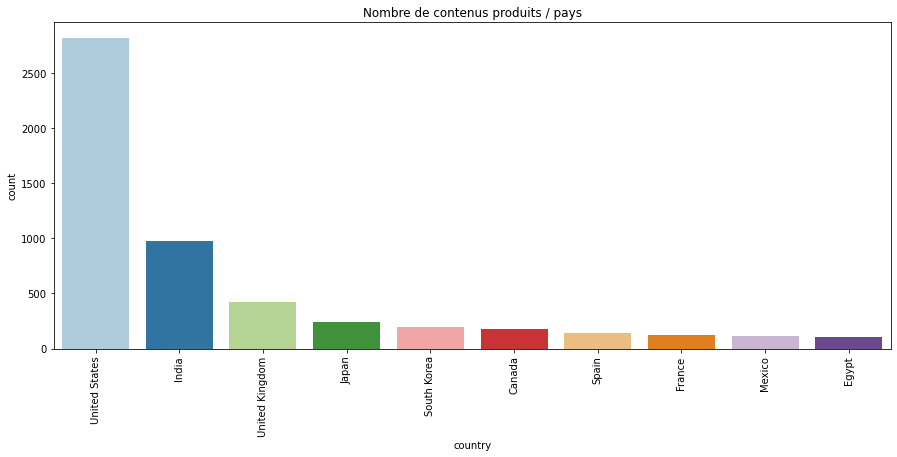

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
palette=sns.color_palette("Paired")
sns.set_palette(palette)
plt.figure(figsize=[15,6])
plt.subplot(111)
# utiliser ce sous-tableau pour créer le countplot
sns.countplot(data=donnees_pays, x="country",order = donnees_pays['country'].value_counts().keys())
plt.title("Nombre de contenus produits / pays")
plt.xticks(rotation=90)
plt.show()

Les Etats-Unis est le pays avec le plus de contenu disponible sur Netflix avant l'Inde et le Royaume-Uni. La France est en 8ème position.

## Nombre de films/séries par classement de contenu (rating)

Comme juste au dessus grace a Seaborn mais avec la colonne "rating".

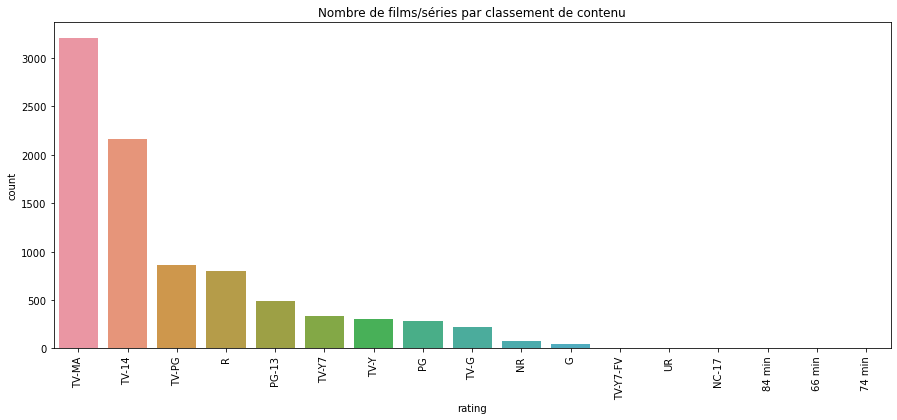

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
palette=sns.color_palette("Paired")
sns.set_palette(palette)
plt.figure(figsize=[15,6])
plt.subplot(111)
# utiliser ce sous-tableau pour créer le countplot
sns.countplot(data=donnees, x="rating",order = donnees['rating'].value_counts().keys())
plt.title("Nombre de films/séries par classement de contenu")
plt.xticks(rotation=90)
plt.show()

## Evolution du nombre de films/séries disponibles sur Netflix au cours du temps

on va repartir du tableau d'origine et supprimer les lignes pour lesquelles les valeurs sont manquantes dans la colonne "date_added" grâce à la méthode notna().

Ensuite on va utiliser la fonction to_datetime() de pandas pour formater la colonne "date_added" en format datetime64.

Enfin on va ajouter une colonne "year_added" contenant uniquement l'année où le contenu a été ajouté sur Netflix et non pas la date complète.

Pour le graphique on utilisera la fonction pointplot() de Seaborn 

In [29]:
donnees_dates=pd.read_csv("netflix_titles.csv", index_col=[0])
donnees_dates=donnees_dates[donnees_dates["date_added"].notna()]
donnees_dates["date_added"] = pd.to_datetime(donnees_dates['date_added'])
donnees_dates['year_added'] = donnees_dates['date_added'].dt.year.astype("int")
donnees_dates.head(n=2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021


On groupe le dataframe sur les colonnes year_added et type avec la méthode groupby()

In [30]:
donnees_dates.groupby(['year_added','type']).size().reset_index(name='Count').tail(10)

,year_added,type,Count
14,2017,Movie,839
15,2017,TV Show,349
16,2018,Movie,1237
17,2018,TV Show,412
18,2019,Movie,1424
19,2019,TV Show,592
20,2020,Movie,1284
21,2020,TV Show,595
22,2021,Movie,993
23,2021,TV Show,505


Traçage du graphique

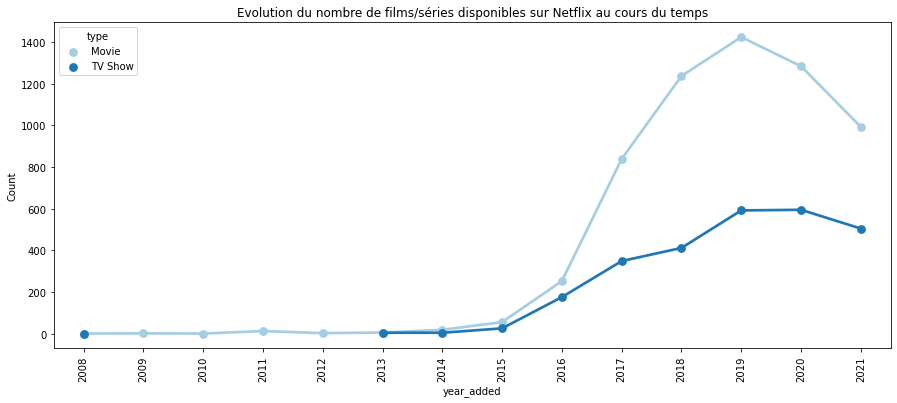

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[15,6])
plt.subplot(111)
plt.title("Evolution du nombre de films/séries disponibles sur Netflix au cours du temps")
donnees_pointplot=donnees_dates.groupby(['year_added','type']).size().reset_index(name='Count')
sns.pointplot(x ='year_added', y ='Count', data = donnees_pointplot, hue="type")
plt.xticks(rotation=90)
plt.show()

On constate un boom d'ajout de contenus à partir de 2014/2015.

## Graphique qui montre l'évolution du nombre de films/séries produits par les 10 pays les plus producteurs de contenus sur Netflix, au fil des ans

On formate les dates comme précédemment, on crée un sous tableau contenant uniquement les données des 10 pays les plus présents sur Netflix puis on trace le graphiqiue avec pointplot.

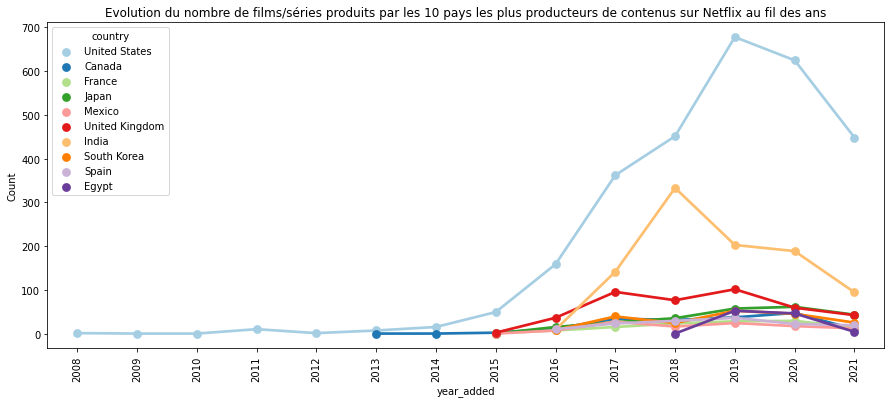

In [33]:
# formatage des dates
donnees_dates=pd.read_csv("netflix_titles.csv", index_col=[0])
donnees_dates=donnees_dates[donnees_dates["date_added"].notna()]
donnees_dates["date_added"] = pd.to_datetime(donnees_dates['date_added'])
donnees_dates['year_added'] = donnees_dates['date_added'].dt.year.astype("int")
# sélection des 10 pays les plus producteurs
series_10_pays=donnees_dates["country"].value_counts().head(n=10)
donnees_pays=donnees_dates[donnees_dates["country"].isin(series_10_pays.keys())]
# création du graphique
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[15,6])
plt.subplot(111)
plt.title("Evolution du nombre de films/séries produits par les 10 pays les plus producteurs de contenus sur Netflix au fil des ans")
# on groupe le DataFrame sur les variables year_added et country pour étudier le nombre de contenus par année et par pays
donnees_pointplot=donnees_pays.groupby(['year_added','country']).size().reset_index(name='Count')
sns.pointplot(x ='year_added', y ='Count', data = donnees_pointplot, hue="country")
plt.xticks(rotation=90)
plt.show()

On constate une augmentation du nombre d'ajouts de contenus vers 2015, puis une baisse générale en 2019 qui es encore plus accentué pour les Etats-Unis.

## Distribution de la durée des films disponibles sur Netflix

A partir de la colonne "duration" création d'une nouvelle série dans laquelle la durée des films sera en nombre entier. On supprime donc le texte " min" puis on transforme la colonne en "int" qu'on stock dans une variable nommée duree.

In [35]:
donnees=pd.read_csv("netflix_titles.csv", index_col=[0])
# sélection des contenus correspondant à un film
donnees_film=donnees[(donnees["type"]=="Movie")]
# on donne une serie a la colonne "duration" contenant les valeur de la colonne "duration" sans le texte " min" et qu'on a transformé en integer grâce à la fonction astype("float64")
duree=pd.Series(donnees_film["duration"].str.replace(" min", "").astype("float64"))
# on remplace le mot " min" par rien

A partir de la variable "duree" contenant les durées des films du jeu de données on trace un histogramme avec la fonction distplot() de Seaborn.

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


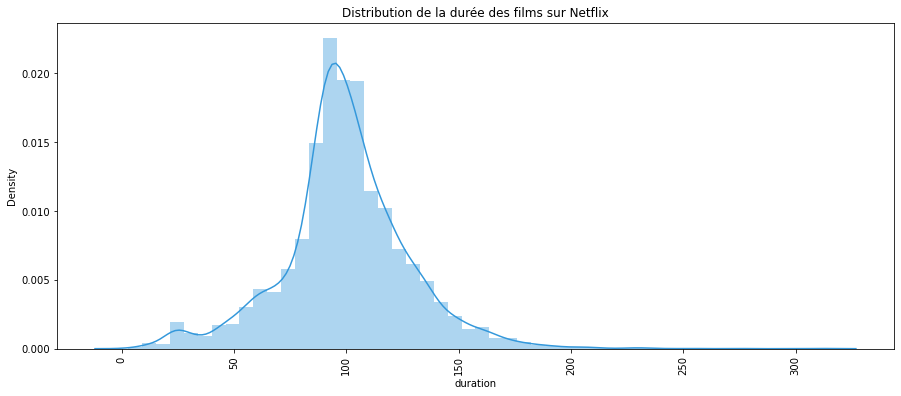

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
palette= sns.color_palette(["#3498db","#e74c3c"])
sns.set_palette(palette)
plt.figure(figsize=[15,6])
plt.subplot(111)
sns.distplot(duree)
plt.title("Distribution de la durée des films sur Netflix")
plt.xticks(rotation=90)
plt.show()

La durée moyenne d'un film est de 100min soit 1h40. Il y a de tout, des mini-films courts ainsi que de très long films. 

In [37]:
duree.describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

## Graphique représentant le nombre de séries par modalité de nombre de saisons

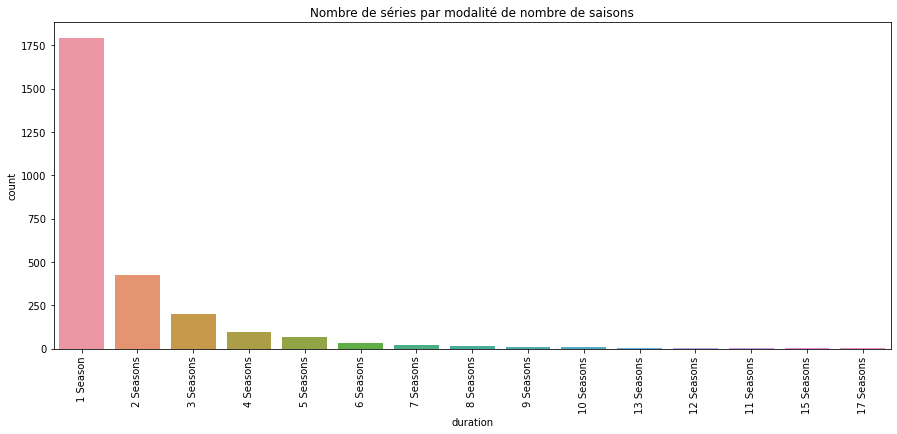

In [38]:
donnees_series=donnees[(donnees["type"]=="TV Show")]
import matplotlib.pyplot as plt
import seaborn as sns
palette=sns.color_palette("Paired")
sns.set_palette(palette)
plt.figure(figsize=[15,6])
plt.subplot(111)
sns.countplot(data=donnees_series, x="duration",order = donnees_series['duration'].value_counts().keys())
plt.title("Nombre de séries par modalité de nombre de saisons")
plt.xticks(rotation=90)
plt.show()

Beaucoup beaucoup de séries n'ont qu'une seule saison. 
Le nombre maximum de saison est de 17.

In [40]:
donnees[(donnees["duration"]=="17 Seasons")]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...


En conclusion la série avec le plus de saison et donc la plus longue présente sur la plateforme Netflix est la série Grey's Anatomy qui date de 2020, l'année de sortie de la première saison sur Netflix.